In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Read the dataset
df = pd.read_csv('height-weight.csv')
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

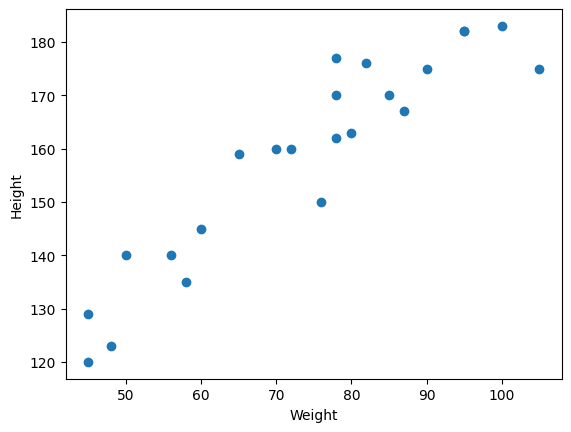

In [2]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
# 1. Divide the dataset into dependent and independent features
X = df[['Weight']] # Independent features
y = df[['Height']] # dependent feature

'train_test_Split' : Split arrays or matrices into random train and test subsets.

In [9]:
# 2. Train Split Test
from sklearn.model_selection import train_test_split

print('Before splitting:', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # 20 % of total data from X will be taken as test data
print('After Splitting 20% of X data points:', X_train.shape, X_test.shape, y_train.shape, y_test.shape) # splits 20% of data from X and placed in X_test variable

Before splitting: (23, 1)
After Splitting 20% of X data points: (18, 1) (5, 1) (18, 1) (5, 1)


'random_state' : 
Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used.

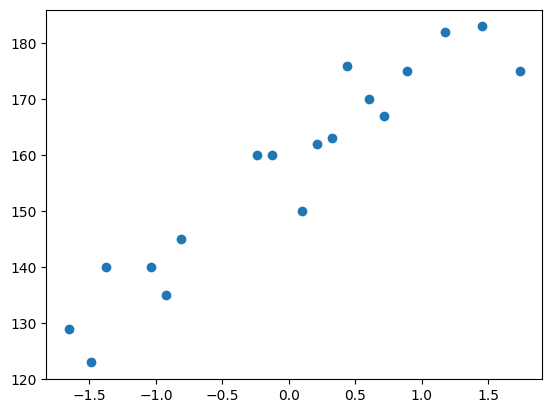

In [5]:
# 3. Standardize the dataset (Scaling down dataset to reach optimal minimum quicker)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # just transform, the model SHOULD HAVE NO IDEA about the test data

plt.scatter(X_train, y_train)

#### Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:
### z = (x - u) / s
#### where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False

In [14]:
# 4. Training the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

The slope or coefficient of weight: [[0.9630459]]
Intercept [85.96709053]


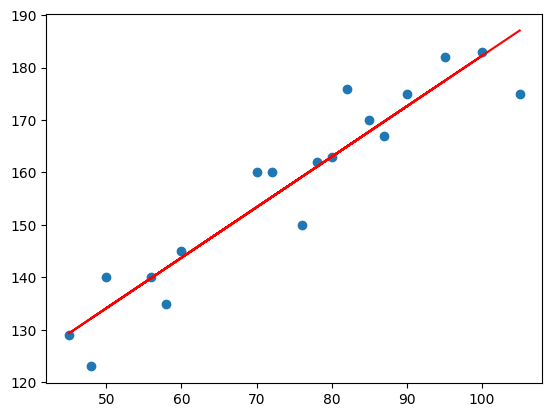

In [16]:
print('The slope or coefficient of weight:', regressor.coef_)
print('Intercept', regressor.intercept_)

plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r') # Best fit line

## Prediction of train data
1. Predicted Height Output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

## Prediction of test data
1. Predicted Height Output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [18]:
y_pred_test = regressor.predict(X_test)
y_pred_test, y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

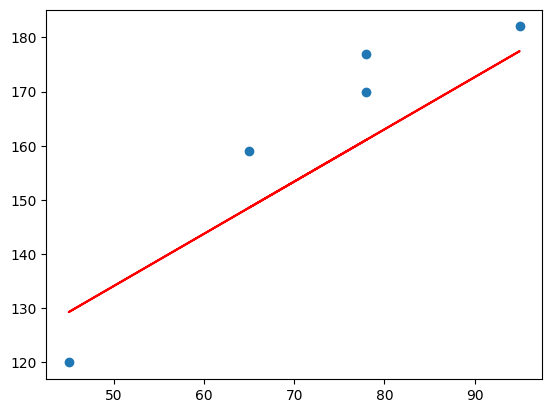

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r') # Best fit line

In [14]:
# 5. Performance Matrix
# Calculating MSE, MAE, RMSE
# R Squared, Adjusted R Squared

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print('MSE:', mse, '\nMAE:', mae, '\nRMSE:', rmse)

MSE: 109.77592599051664 
MAE: 9.822657814519232 
RMSE: 10.477400726827081


## R Square
R^2 = 1 - SSR / SST
<Br>R^2: Coefficient of determination
<br>SSR: Sum Of Sqaures of Residuals
<br>SST: Total sum of squares

## Adjusted R Sqaure
Adjusted R2 = 1 - [(1 - R2) * (n - 1) / (n - k - 1)]
<Br> where:
<br> R2 : The R2 of the model
<br> n: The number of observations
<br>k: The number of predictor variables

In [17]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_test)
print('Accuracy:', score) # R Sqaure

Accuracy: 0.776986986042344


In [18]:
adjusted_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print('Adjusted R Sqaure', adjusted_r2)

Adjusted R Sqaure 0.7026493147231252


In [19]:
## New data point, weight = 80

scaled_weight = scaler.transform([[80]])
print('Scaled WEIGHT: ', scaled_weight)
print('Height prediction for weight 80:', regressor.predict([scaled_weight[0]]))

Scaled WEIGHT:  [[0.32350772]]
Height prediction for weight 80: [[163.01076266]]


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


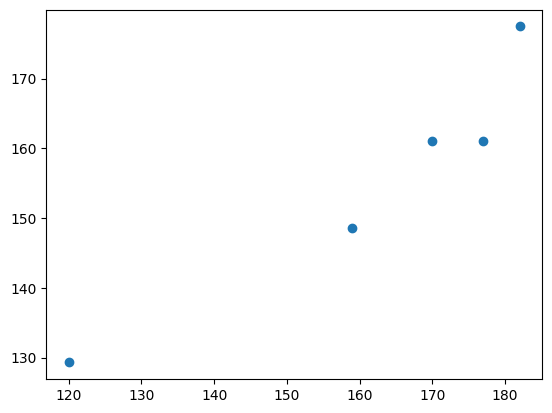

In [20]:
# Assumptions

# Plot a scatter plot for prediction
plt.scatter(y_test, y_pred_test)

In [21]:
# Residuals

residuals = y_test - y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


C:\Users\karth\AppData\Local\Temp\ipykernel_19484\880828886.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde='True')
C:\Users\karth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

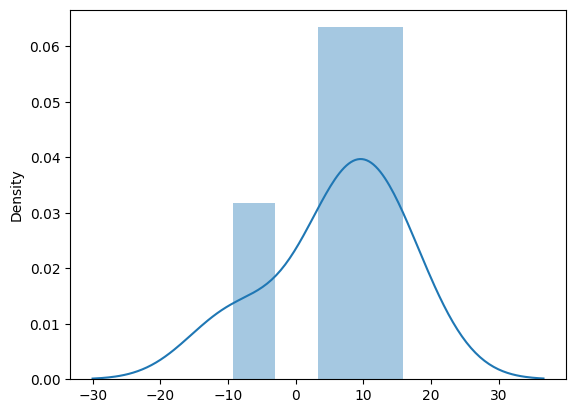

In [22]:
# PLot residuals

import seaborn as sns
sns.distplot(residuals, kde='True')

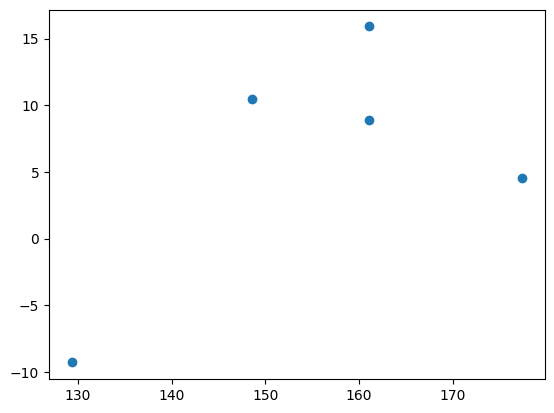

In [23]:
# Scatter plot wrt prediction and residuals
# uniform distribution

plt.scatter(y_pred_test, residuals)